# Twitter WordCloud - Eleições 2022

Esse código, desenvolvido em Python, extrai tweets mais recentes, com a API do Twitter, pelos temas: "#Eleições2022 -#SOSBrasil", agrupa todos em dataframes e gera uma imagem com as palavras mais presentes nos tweets.

In [ ]:
# installa dependencias

# !pip install tweepy --quiet
# !pip install pandas --quiet
# !pip install wordcloud

In [14]:
# importa módulos
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# lê as credenciais de login do Twitter
with open("login.txt", "r") as file:
    consumer_key=file.readline().strip("\n")
    consumer_secret=file.readline().strip("\n")
    bearer_token=file.readline().strip("\n")
    access_token=file.readline().strip("\n")
    access_token_secret=file.readline().strip("\n")

In [3]:
# faz autenticação
client = tweepy.Client(
    bearer_token
)

In [8]:
# pesquisa por tweets por palavra-chave: "#Eleições2022 -#SOSBrasil"
response = client.search_recent_tweets("#Eleições2022 -#SOSBrasil", max_results=100)
tweets = response.data

for tweet in tweets:
    print(tweet.text)

RT @CarbonBrief: NEW – Analysis: Bolsonaro election loss could cut Brazilian Amazon deforestation by 89% | 
@Josh_Gabbatiss w/ comment from…
RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest and informative…
RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest and informative…
RT @UOLNoticias: DATAFOLHA PRESIDENCIAL| 1º turno 📈

Lula 47%
Bolsonaro 33%

#Eleições2022 #uoleleições2022
RT @Brunostati: Ele não deixa investigar a corrupção!!! #LulaNoPrimeiroTurno  #Eleiçoes2022  #lula https://t.co/dT5KKbSMM7
Vou viajar 600km até meu colégio eleitoral. Jamias deixarei de votar nessa eleição. É o dever da nossa geração!

#LulaNoPrimeiroTurno
#Eleicoes2022
RT @Brunostati: Ele não deixa investigar a corrupção!!! #LulaNoPrimeiroTurno  #Eleiçoes2022  #lula https://t.co/dT5KKbSMM7
RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of 

In [9]:
# Agrupa tweets por dataframe
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list, columns=["Texto"])
pd.options.display.max_colwidth = 130
df.head()

,Texto
0,RT @CarbonBrief: NEW – Analysis: Bolsonaro election loss could cut Brazilian Amazon deforestation by 89% | \n@Josh_Gabbatiss w...
1,RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest an...
2,RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest an...
3,RT @UOLNoticias: DATAFOLHA PRESIDENCIAL| 1º turno 📈\n\nLula 47%\nBolsonaro 33%\n\n#Eleições2022 #uoleleições2022
4,RT @Brunostati: Ele não deixa investigar a corrupção!!! #LulaNoPrimeiroTurno #Eleiçoes2022 #lula https://t.co/dT5KKbSMM7


In [10]:
# Agrupando tudo em uma única string com espaços
string = pd.Series(df['Texto'].values).str.cat(sep=" ")
string

'RT @CarbonBrief: NEW – Analysis: Bolsonaro election loss could cut Brazilian Amazon deforestation by 89% | \n@Josh_Gabbatiss w/ comment from… RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest and informative… RT @thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest and informative… RT @UOLNoticias: DATAFOLHA PRESIDENCIAL| 1º turno 📈\n\nLula 47%\nBolsonaro 33%\n\n#Eleições2022 #uoleleições2022 RT @Brunostati: Ele não deixa investigar a corrupção!!! #LulaNoPrimeiroTurno  #Eleiçoes2022  #lula https://t.co/dT5KKbSMM7 Vou viajar 600km até meu colégio eleitoral. Jamias deixarei de votar nessa eleição. É o dever da nossa geração!\n\n#LulaNoPrimeiroTurno\n#Eleicoes2022 RT @Brunostati: Ele não deixa investigar a corrupção!!! #LulaNoPrimeiroTurno  #Eleiçoes2022  #lula https://t.co/dT5KKbSMM7 RT @thejuicemedia: The Brazilian Government has made a tourism ad

In [11]:
# remover caracteres especiais
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i], "")
string

'RT CarbonBrief: NEW – Analysis: Bolsonaro election loss could cut Brazilian Amazon deforestation by 89% | \nJosh_Gabbatiss w/ comment from… RT thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest and informative… RT thejuicemedia: The Brazilian Government has made a tourism ad ahead of the coming election and it’s surprisingly honest and informative… RT UOLNoticias: DATAFOLHA PRESIDENCIAL| 1º turno 📈\n\nLula 47%\nBolsonaro 33%\n\nEleições2022 uoleleições2022 RT Brunostati: Ele não deixa investigar a corrupção!!! LulaNoPrimeiroTurno  Eleiçoes2022  lula https://t.co/dT5KKbSMM7 Vou viajar 600km até meu colégio eleitoral. Jamias deixarei de votar nessa eleição. É o dever da nossa geração!\n\nLulaNoPrimeiroTurno\nEleicoes2022 RT Brunostati: Ele não deixa investigar a corrupção!!! LulaNoPrimeiroTurno  Eleiçoes2022  lula https://t.co/dT5KKbSMM7 RT thejuicemedia: The Brazilian Government has made a tourism ad ahead of the comi

In [56]:
# Ignora classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Eleicoes2022", "Eleições2022", "RT", "por", "de", "f", "w", "pelo", "Brazilian", "dar", "pois", "nesta", "em", "um", "da", "ser", "aqui", "vou", "dos", "quem", "tem", "NEW", "do", "não", "election", "t", "foi", "para", "made", "https", "ahead", "Na", "S", "ao", "que", "co", "coming", "ad", "O", "é", "Mais", "se", "e", "das", "depois", "dessa", "ontem", "uma", "tira", "site", "diz"])

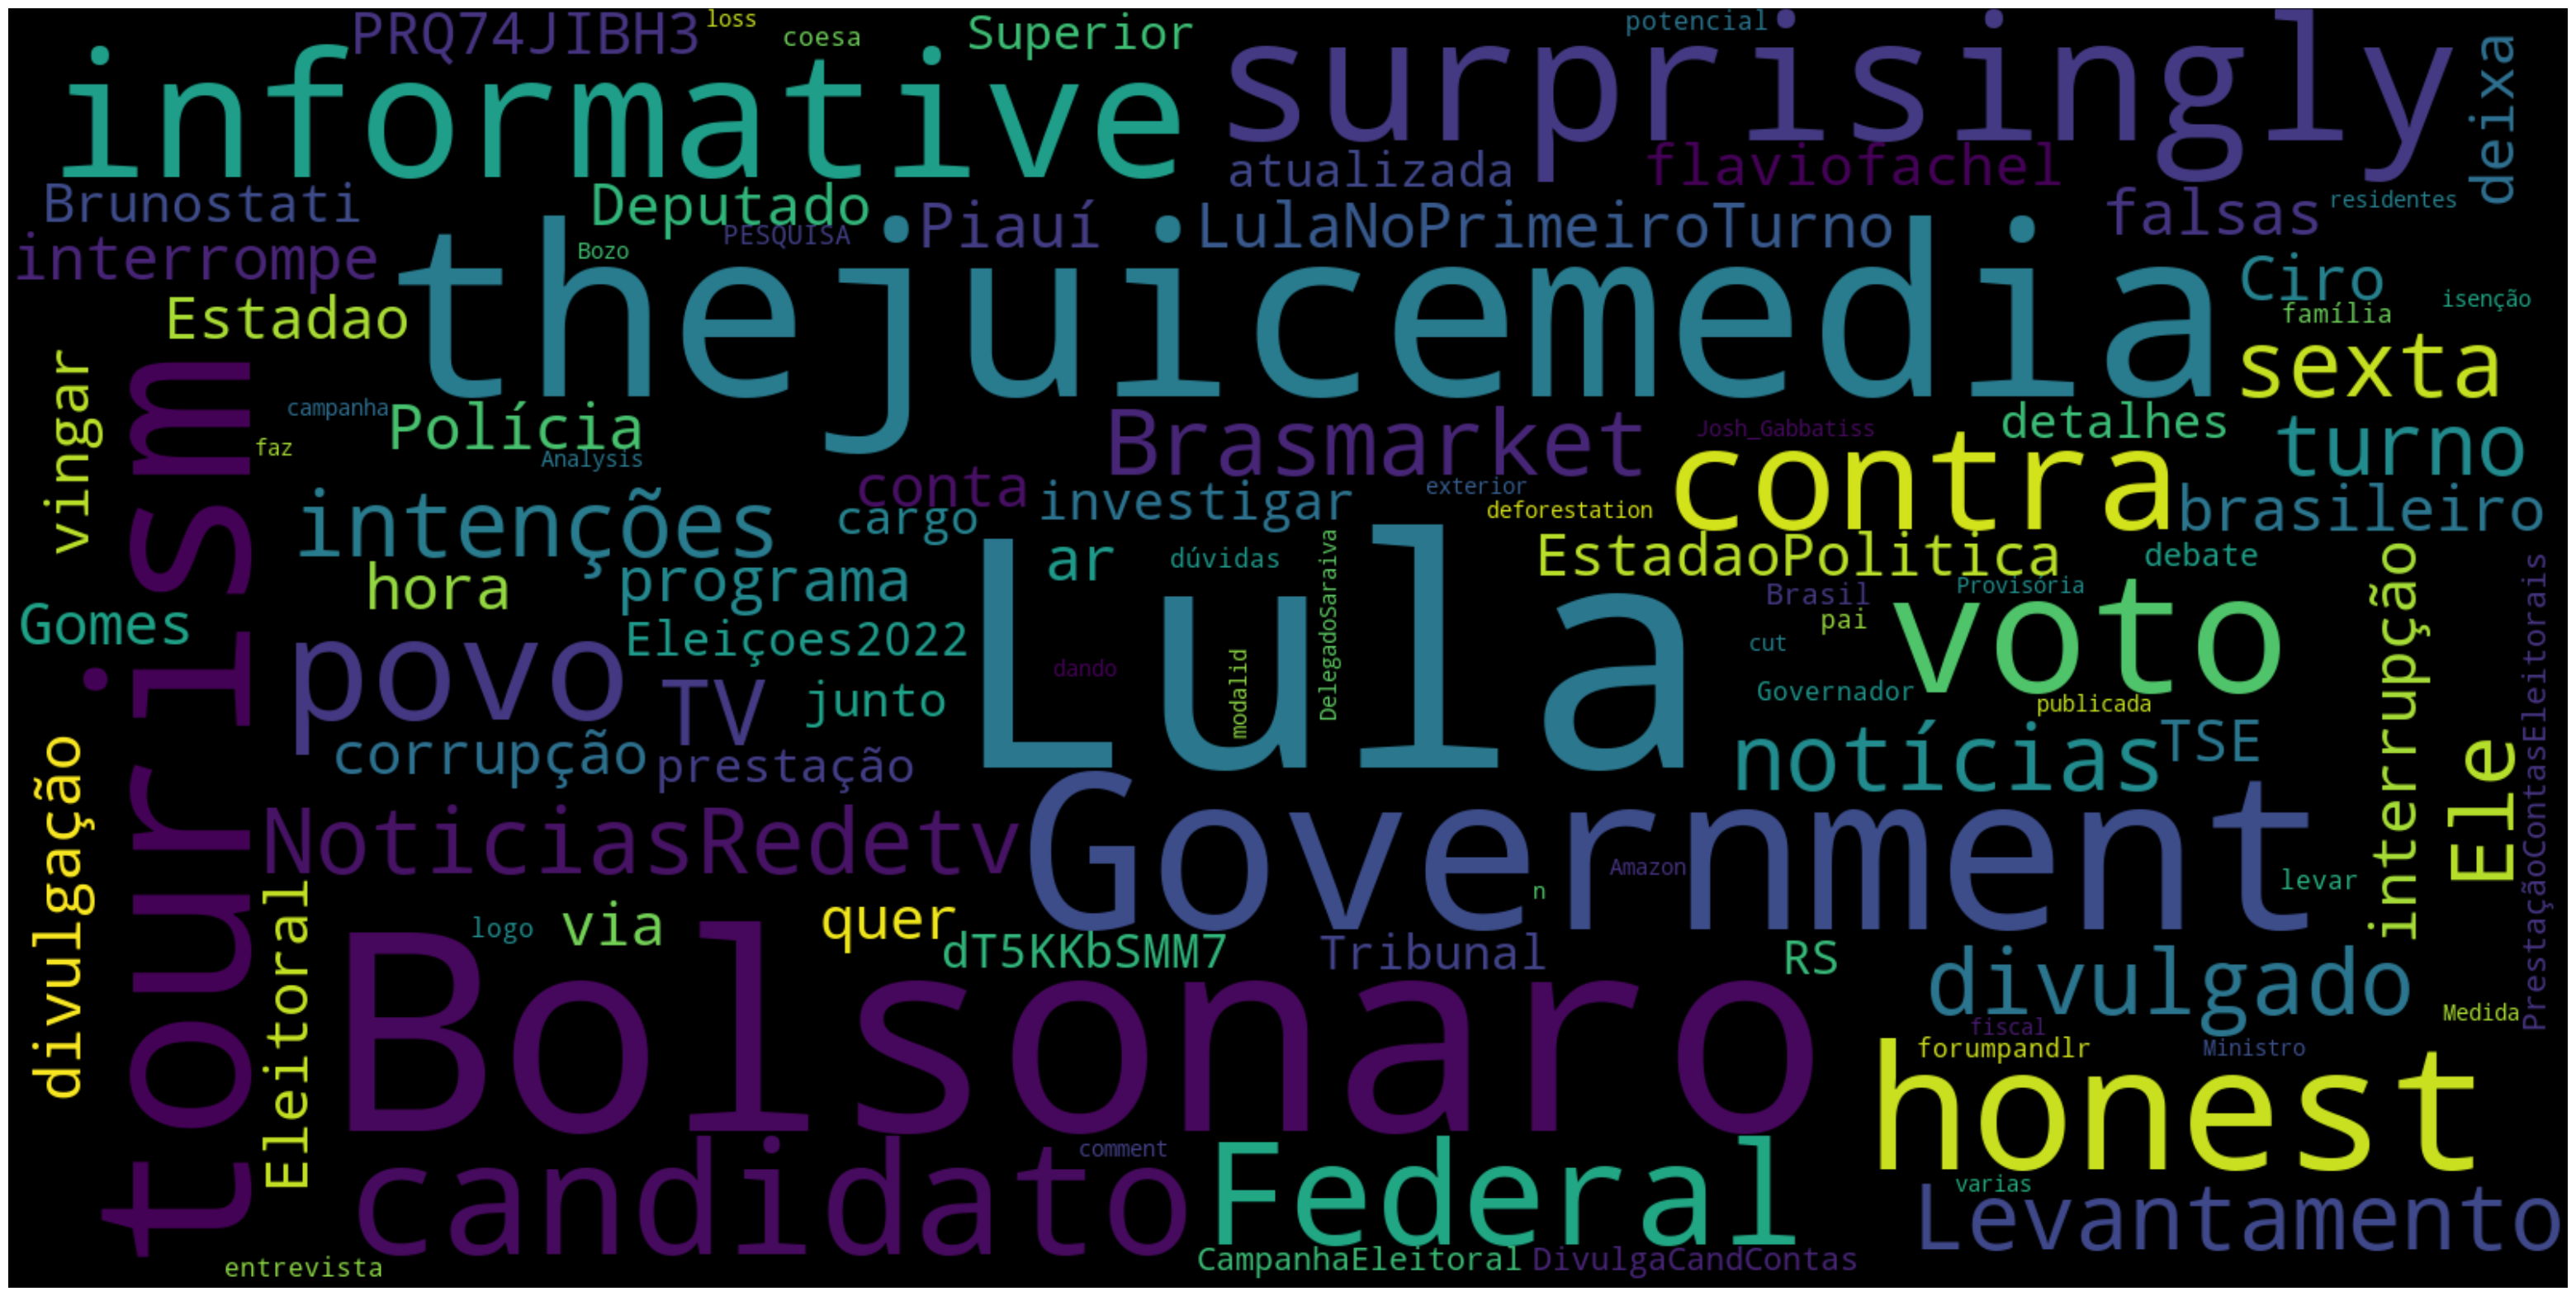

In [57]:
# Gera texto dos tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords, height=800, max_font_size=200, max_words=100, collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()